# Heatmap

This notebook contains examples of how to use the datachart package to create heatmaps.
The examples sequentially build on each other, going from simple to complex.

The heatmaps are created using the `heatmap` function found in the `charts` package. Let's import it:

In [1]:
from datachart import heatmap

The `heatmap` function is that accepts a `dict` object containing the chart attributes, as shown in the following examples.

NOTE: To avoid double figure generation, the `heatmap` function is preceded by the `_ =` operator. The double figures are generated because `heatmap` returns the `plt.Figure` object, which is then used to save the figure locally.

## Basic heatmap

To create a basic heatmap simply pass `dict` object containing only the `charts` attribute. The `charts` attribute value is either a `dict` or a `List[dict]` where each dictionary contains some of the following attributes:

```python
{
  "data": List[List[Union[int, float, None]]],                  # The data of the chart
  "style": {                                                    # The style of the heatmap (optional)
    "plot.heatmap.cmap":      Optional[str],                    # The color map of the heatmap
    "plot.heatmap.alpha":     Optional[float],                  # The heatmap alpha (opacity)
    "plot.heatmap.font.size": Optional[Union[int, float, str]], # The heatmap cell font size
    "plot.heatmap.font.color": Optional[str],                   # The heatmap cell font color
    "plot.heatmap.font.width": Optional[float],                 # The heatmap cell font width
    "plot.heatmap.font.alpha": Optional[float],                 # The heatmap cell font alpha (opacity)
  },
  "subtitle": Optional[str],                                    # The title of the chart
  "xlabel":   Optional[str],                                    # The x-axis label
  "ylabel":   Optional[str],                                    # The y-axis label

  "xticks": Optional[List[Union[int, float]]],                  # the x-axis ticks
  "xticklabels": Optional[List[Union[str, float, str]],         # the x-axis tick labels (must be same length as xticks)
  "xtickrotate": Optional[int],                                 # the x-axis tick labels rotation
  "yticks": Optional[List[Union[int, float]]],                  # the y-axis ticks
  "yticklabels": Optional[List[Union[str, float, str]],         # the y-axis tick labels (must be same length as yticks)
  "ytickrotate": Optional[int],                                 # the y-axis tick labels rotation

  "colormap": {
    "orientation": Optional[ORIENTATION],                       # the colormap orientation
  }
}
```

### Draw only the heatmap

The following example shows how only the `charts["data"]` attribute is required to draw the heatmap.

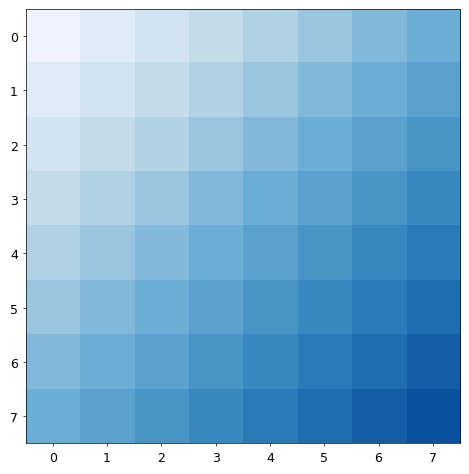

In [2]:
_ = heatmap({"charts": {"data": [[x + y for x in range(8)] for y in range(8)]}})

### Add the title and the x and y labels

Adding the `title`, `xlabel` and `ylabel` attributes is straightforward.

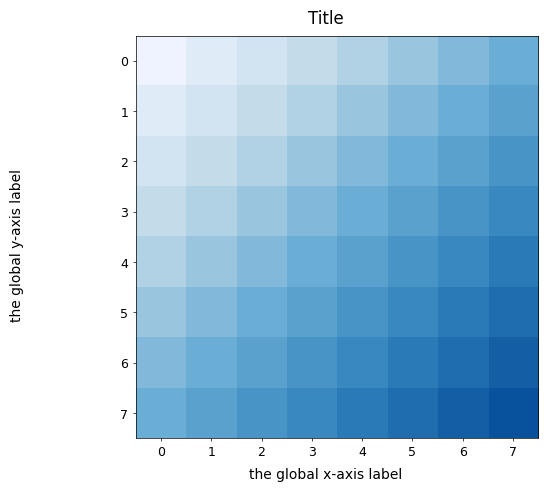

In [3]:
_ = heatmap(
    {
        "charts": {"data": [[x + y for x in range(8)] for y in range(8)]},
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
    }
)

### Changing the figure size

To change the figure size, simply add the `figsize` attribute. The `figsize` attribute can be a tuple (width, height), values are in inches. There are some predefined `FIG_SIZE` constants in the `constants` package, to make it easier to use.

In [4]:
from datachart.constants import FIG_SIZE

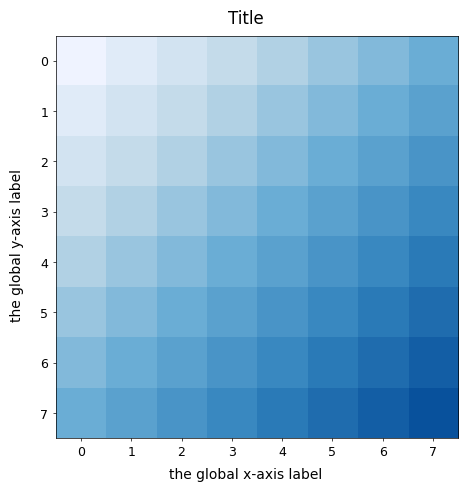

In [5]:
_ = heatmap(
    {
        "charts": {"data": [[x + y for x in range(8)] for y in range(8)]},
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.SQUARE_SMALL,  # must be a tuple (width, height), values are in inches
    }
)

### Adding the colorbar and heatmap values

To add the colorbar, simply add the `show_colorbar` attribute. 

To add the heatmap values, simply add the `show_heatmap_values` attribute.

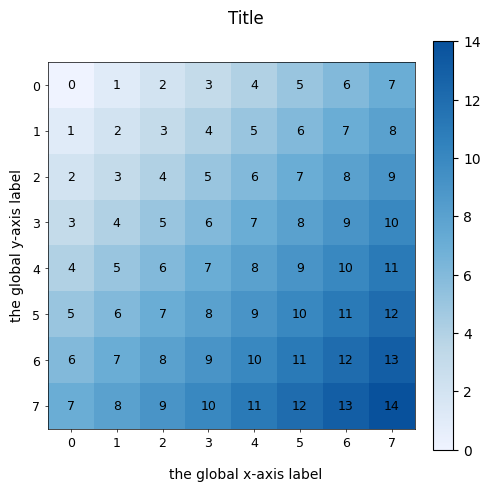

In [6]:
_ = heatmap(
    {
        "charts": {
            "data": [[x + y for x in range(8)] for y in range(8)],
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.SQUARE_SMALL,
        "show_heatmap_values": True,
        "show_colorbars": True,
    }
)

### Formatting the heatmap values

To format the values shown in the heatmap, add the `valfmt` attribute, which is a `string` depicting how to format the heatmap values. Examples of such formats are:

- `{x:.2f}`: formats the value as a float with two decimal places
- `{x:.2%}`: formats the value as a percentage with two decimal places

**NOTE:** that the `x` value in the format must be present in the string.

To help you in formatting the values, there are some predefined `VALFMT` constants in the `constants` package, to make it easier to use.

In [7]:
from datachart.constants import VALFMT

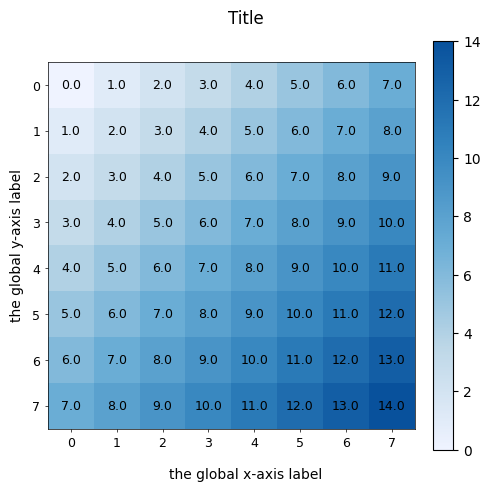

In [8]:
_ = heatmap(
    {
        "charts": {
            "data": [[x + y for x in range(8)] for y in range(8)],
            "valfmt": VALFMT.DECIMAL,
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.SQUARE_SMALL,
        "show_heatmap_values": True,
        "show_colorbars": True,
    }
)

### Adding labels to the x and y axis

To add the labels to the x and y axis, add the `xticklabels` and `yticklabels` attributes. The positions of the ticks are determined by the `xticks` and `yticks` attributes. To define the rotation of the labels, add the `xtickrotate` and `ytickrotate` attributes.

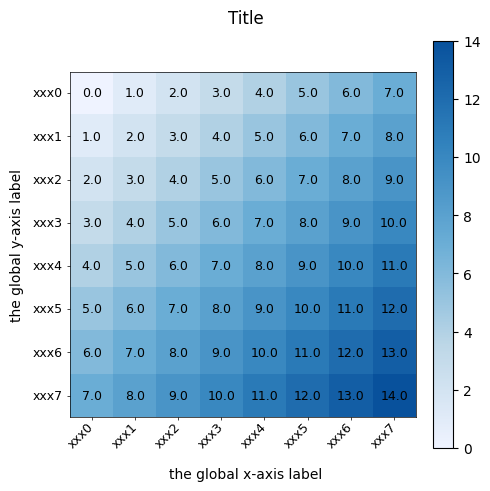

In [9]:
_ = heatmap(
    {
        "charts": {
            "data": [[x + y for x in range(8)] for y in range(8)],
            "valfmt": VALFMT.DECIMAL,
            "xticks": [idx for idx in range(8)],
            "xticklabels": [f"xxx{idx}" for idx in range(8)],
            "xtickrotate": 45,
            "yticks": [idx for idx in range(8)],
            "yticklabels": [f"xxx{idx}" for idx in range(8)],
            "ytickrotate": 0,
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.SQUARE_SMALL,
        "show_heatmap_values": True,
        "show_colorbars": True,
    }
)

### Changing the heatmap style

To change a single heatmap style, simply add the `style` attribute with the corresponding attributes. The style attributes are:
- `"plot.heatmap.cmap"`: The colormap used to draw the heatmap
- `"plot.heatmap.alpha"`: The alpha of the heatmap (opacity)
- `"plot.heatmap.font.size"`: The font size.
- `"plot.heatmap.font.color"`: The font color.
- `"plot.heatmap.font.style"`: The font style.
- `"plot.heatmap.font.weight"`: The font weight.

Again, to help with the style settings, some constants are defined in the `constants` package, such as:
- `FONT_STYLE`: The font style (normal, italic, etc.)
- `FONT_WEIGHT`: The font weight (normal, bold, etc.)

In [10]:
from datachart.constants import COLORS, FONT_STYLE, FONT_WEIGHT

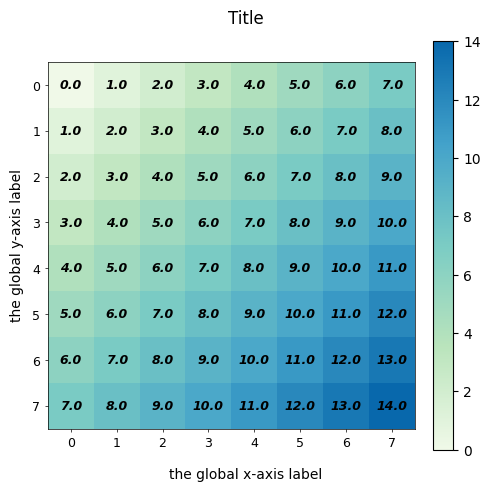

In [11]:
_ = heatmap(
    {
        "charts": {
            "data": [[x + y for x in range(8)] for y in range(8)],
            "valfmt": VALFMT.DECIMAL,
            "style": {
                "plot.heatmap.cmap": COLORS.GnBu,
                "plot.heatmap.font.style": FONT_STYLE.ITALIC,
                "plot.heatmap.font.weight": FONT_WEIGHT.BOLD,
            }
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.SQUARE_SMALL,
        "show_heatmap_values": True,
        "show_colorbars": True,
    }
)

### Normalizing the heatmap

To change how the heatmap is normalized, add the `norm` attribute inside the `chart` attribute. The possible options for `norm` are:

- `None`: No normalization
- `"linear"`: Linear normalization
- `"log"`: Log normalization
- `"symlog"`: Symlog normalization
- `"asinh"`: Asinh normalization

Again, to help with the style settings, some constants are defined in the `constants` package, such as:
- `NORMALIZE`: The heatmap normalization

In [12]:
from datachart.constants import NORMALIZE

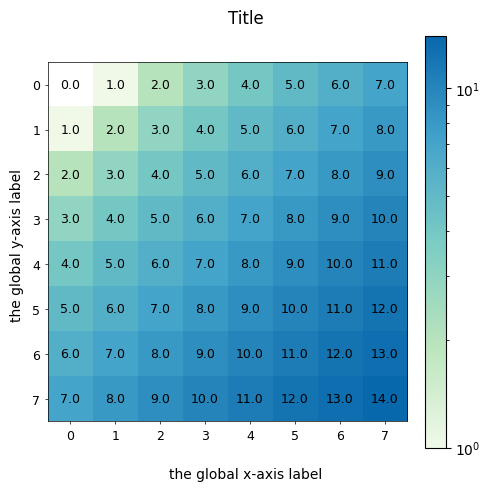

In [13]:
_ = heatmap(
    {
        "charts": {
            "data": [[x + y for x in range(8)] for y in range(8)],
            "norm": NORMALIZE.LOG,
            "valfmt": VALFMT.DECIMAL,
            "style": {
                "plot.heatmap.cmap": COLORS.GnBu,
            }
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.SQUARE_SMALL,
        "show_heatmap_values": True,
        "show_colorbars": True,
    }
)

## Show multiple heatmaps

To add multiple heatmaps, simply add the `charts` attribute with a list of charts, as shown below.

NOTE: Other attributes are the same as for when creating the single chart.

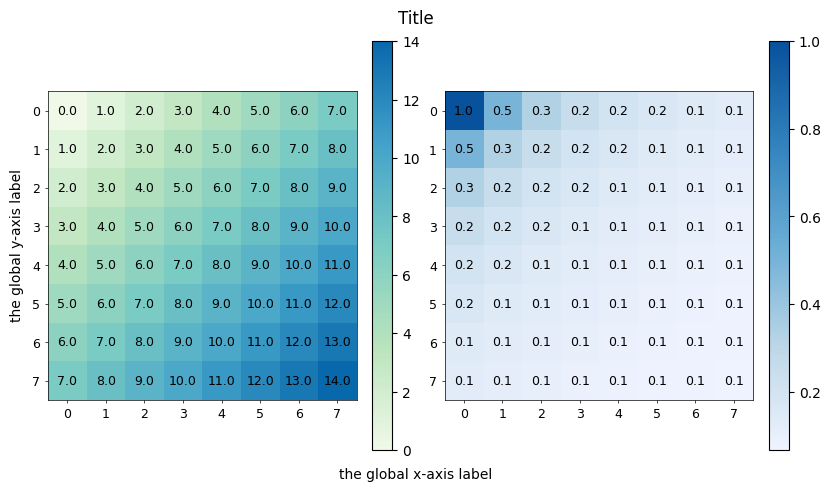

In [14]:
_ = heatmap(
    {
        "charts": [{
            "data": [[x + y for x in range(8)] for y in range(8)],
            "valfmt": VALFMT.DECIMAL,
            "style": {
                "plot.heatmap.cmap": COLORS.GnBu,
            }
        }, {
            "data": [[1 / (x + y + 1) for x in range(8)] for y in range(8)],
            "valfmt": VALFMT.DECIMAL,
        }],
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_REGULAR,
        "show_heatmap_values": True,
        "show_colorbars": True,
    }
)

### Add a subtitle to each heatmap

To add a subtitle to each line, simply add the `subtitle` attribute to each required chart. In addition, to help with discerning which chart is which, use the `show_legend` attribute to show the legend of the charts.

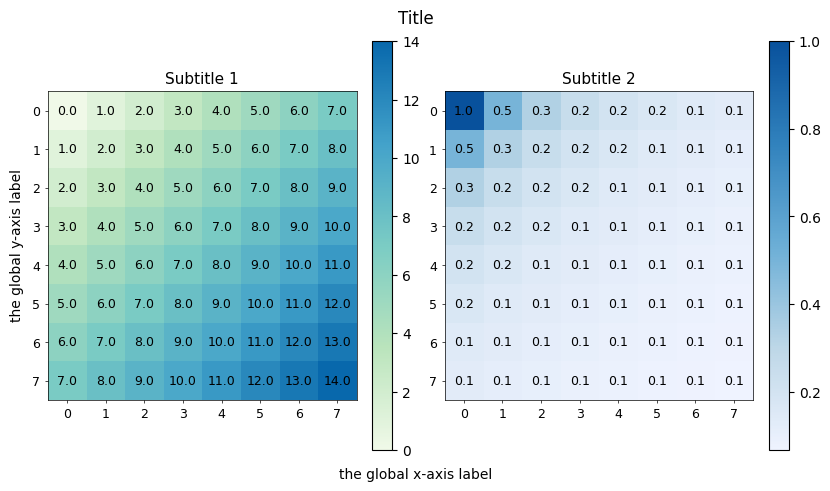

In [15]:
_ = heatmap(
    {
        "charts": [{
            "subtitle": "Subtitle 1",
            "data": [[x + y for x in range(8)] for y in range(8)],
            "valfmt": VALFMT.DECIMAL,
            "style": {
                "plot.heatmap.cmap": COLORS.GnBu,
            }
        }, {
            "subtitle": "Subtitle 2",
            "data": [[1 / (x + y + 1) for x in range(8)] for y in range(8)],
            "valfmt": VALFMT.DECIMAL,
        }],
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_REGULAR,
        "show_heatmap_values": True,
        "show_colorbars": True,
    }
)

## Configuring the global style

In [16]:
from datachart.themes.default import DEFAULT_THEME

In [17]:
DEFAULT_THEME

{'color.general.singular': 'blue',
 'color.general.multiple': 'spectral',
 'font.general.family': 'sans-serif',
 'font.general.sans-serif': ['Helvetica', 'Arial'],
 'font.general.color': '#000000',
 'font.general.size': 11,
 'font.general.style': 'normal',
 'font.general.weight': 'normal',
 'font.title.size': 12,
 'font.title.color': '#000000',
 'font.title.style': 'normal',
 'font.title.weight': 'normal',
 'font.subtitle.size': 11,
 'font.subtitle.color': '#000000',
 'font.subtitle.style': 'normal',
 'font.subtitle.weight': 'normal',
 'font.xlabel.size': 10,
 'font.xlabel.color': '#000000',
 'font.xlabel.style': 'normal',
 'font.xlabel.weight': 'normal',
 'font.ylabel.size': 10,
 'font.ylabel.color': '#000000',
 'font.ylabel.style': 'normal',
 'font.ylabel.weight': 'normal',
 'axes.spines.top.visible': True,
 'axes.spines.right.visible': True,
 'axes.spines.bottom.visible': True,
 'axes.spines.left.visible': True,
 'axes.spines.width': 0.5,
 'axes.spines.zorder': 100,
 'axes.ticks.len

### Updating the global style

To configure the global style, import the `config` module and use the `update_config` function.	This function accepts any viable style attribute as defined in the `DEFAULT_THEME` dictionary.

In [18]:
from datachart.config import config

from datachart.constants import FONT_WEIGHT

In [19]:
# update the global configuration
# note: this will update the style for all charts
config.update_config(
    config={
        "font.general.sans-serif": ["Inter"],
        "font.title.weight": FONT_WEIGHT.BOLD,
        "plot.heatmap.cmap": COLORS.Orange,
        "axes.spines.top.visible": False,
        "axes.spines.left.visible": False,
        "axes.spines.right.visible": False,
        "axes.spines.bottom.visible": False,
        "axes.spines.width": 0,
    }
)

After updating the global style, it will be applied in all future charts in the script/notebook.

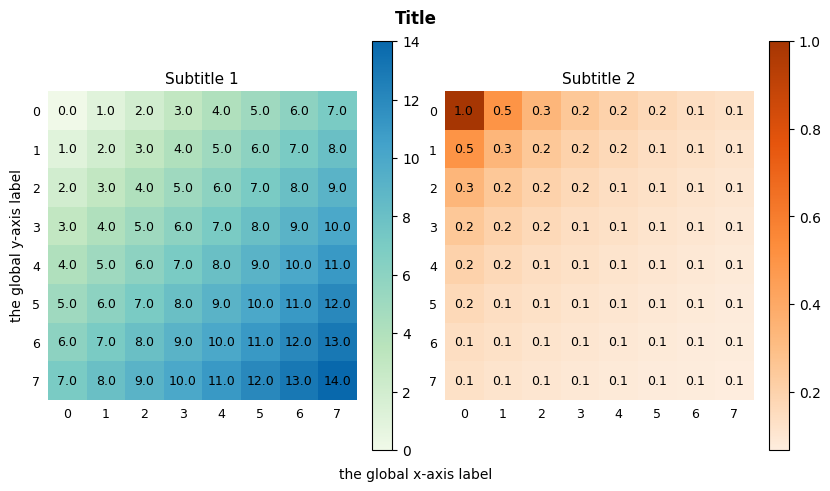

In [20]:
_ = heatmap(
    {
        "charts": [{
            "subtitle": "Subtitle 1",
            "data": [[x + y for x in range(8)] for y in range(8)],
            "valfmt": VALFMT.DECIMAL,
            "style": {
                "plot.heatmap.cmap": COLORS.GnBu,
            }
        }, {
            "subtitle": "Subtitle 2",
            "data": [[1 / (x + y + 1) for x in range(8)] for y in range(8)],
            "valfmt": VALFMT.DECIMAL,
        }],
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_REGULAR,
        "show_heatmap_values": True,
        "show_colorbars": True,
    }
)

### Reseting the global style

You can use the `reset_config` function to reset the global configuration.

In [21]:
# resets the global configuration
config.reset_config()

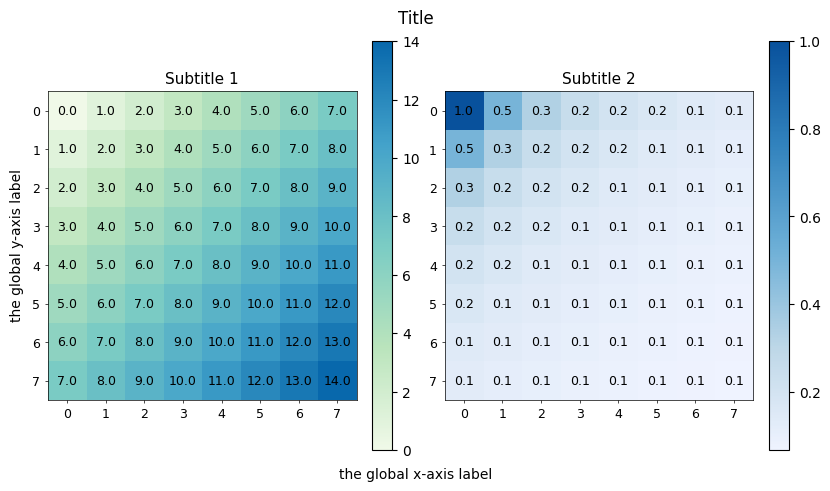

In [22]:
figure = heatmap(
    {
        "charts": [{
            "subtitle": "Subtitle 1",
            "data": [[x + y for x in range(8)] for y in range(8)],
            "valfmt": VALFMT.DECIMAL,
            "style": {
                "plot.heatmap.cmap": COLORS.GnBu,
            }
        }, {
            "subtitle": "Subtitle 2",
            "data": [[1 / (x + y + 1) for x in range(8)] for y in range(8)],
            "valfmt": VALFMT.DECIMAL,
        }],
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_REGULAR,
        "show_heatmap_values": True,
        "show_colorbars": True,
    }
)

## Saving the chart as an image

To save the chart as an image, use the `save_figure` function, found in the `utils.figure` module.

In [23]:
from datachart.utils import save_figure

In [24]:
save_figure(figure, "./fig_heatmap.png", dpi=300)

## Example use cases

### Example 1: Distance comparison

The example below shows how to the heatmap showing the components of the pair-wise distance matrices.

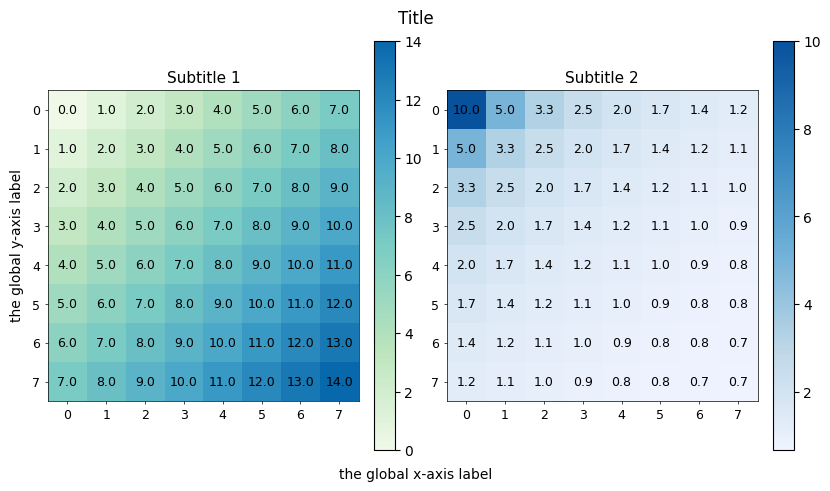

In [25]:
_ = heatmap(
    {
        "charts": [{
            "subtitle": "Subtitle 1",
            "data": [[x + y for x in range(8)] for y in range(8)],
            "valfmt": VALFMT.DECIMAL,
            "style": {
                "plot.heatmap.cmap": COLORS.GnBu,
            }
        }, {
            "subtitle": "Subtitle 2",
            "data": [[10 / (x + y + 1) for x in range(8)] for y in range(8)],
            "valfmt": VALFMT.DECIMAL,
        }],
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_REGULAR,
        "show_heatmap_values": True,
        "show_colorbars": True,
    }
)